* # EMENTA

**Unidade 2: Explorando Modelos em Séries Temporais**
* Conceitos Essenciais em Séries Temporais:
    * Estacionariedade;
    * Função de Autocorrelação;
    * Função de Autocorrelação Parcial.
    * *Caso prático*.
    
* Visão Geral de Modelos para Séries Temporais
    * Diferentes Abordagens: Tempo vs. Frequência.
    * Tipos de Modelos: Erro/Regressão, Não Lineares e ARIMA.

* # Avaliando a Condição de Estacionariedade em Séries Temporais

**Índice Dow Jones:** O Dow Jones Industrial Average, Dow Jones, ou simplesmente Dow, é um índice do mercado de acções de 30 empresas importantes cotadas nas bolsas de valores dos Estados Unidos.

Dataset: indice_dowjones.csv

In [1]:
import pandas as pd

df_dowjones = pd.read_csv('indice_dowjones.csv', index_col = 'Date')


* ### Série Observada (Gráfico)

<AxesSubplot:xlabel='Date'>

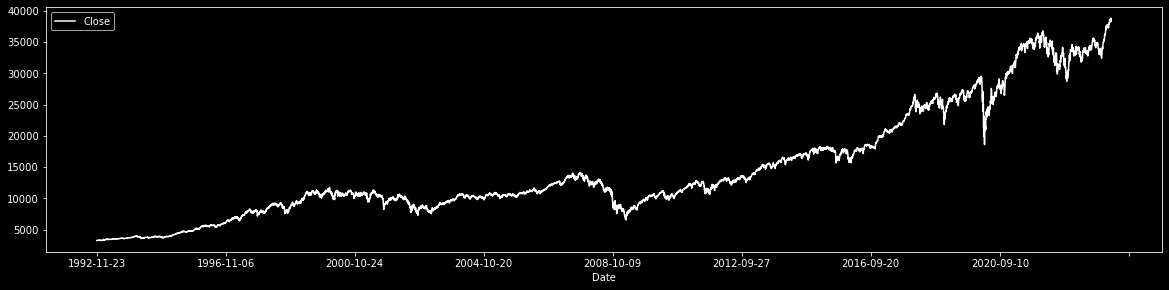

In [8]:
df_dowjones.plot(figsize = (20,4.5), color = 'white')

<AxesSubplot:xlabel='Date'>

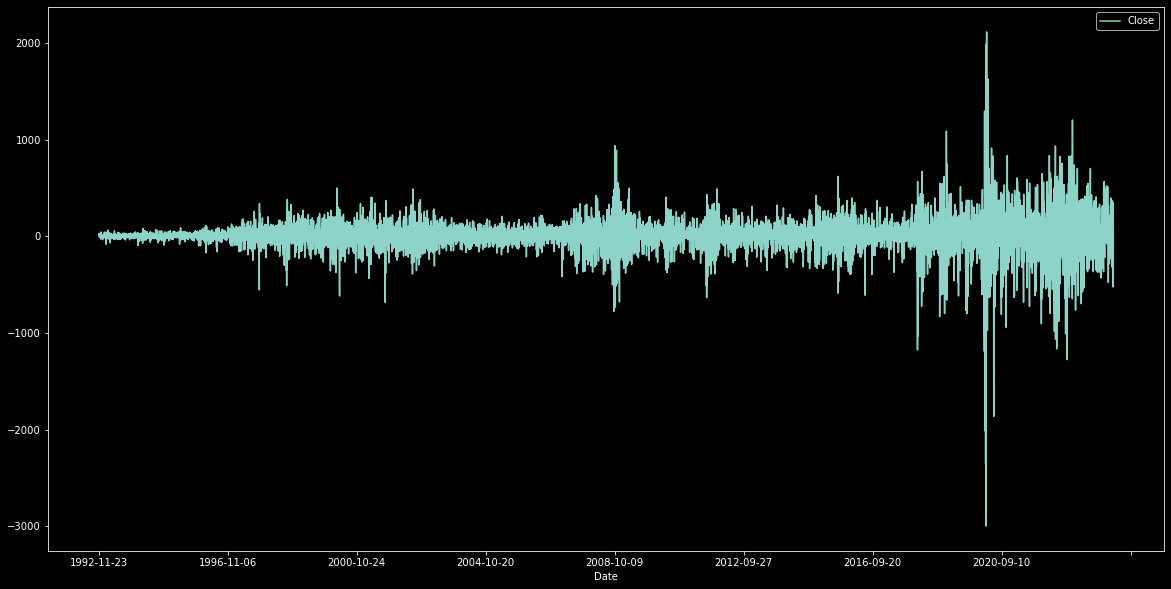

In [7]:
df_dowjones.diff().plot(figsize=(20, 10))

Questões:
* Graficamente, a série possui indicativo de estacionariedade?
* É possível identificar períodos com variações atípicas? Se sim, quais?

* ### Testes Estatísticos KPSS e ADF para verificação de estacionariedade.

### Funções Úteis

In [ ]:
# TESTE ADF
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

# TESTE KPSS
def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        data = kpsstest[0:3], index = ["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)


### Imports Necessários


In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

* TESTE ADF

In [ ]:
adf_test(df_dowjones)

* TESTE KPSS

In [ ]:
kpss_test(df_dowjones)

## Interpretando os resultados dos testes ADF e KPSS

**ADF**

Lembre: A hipótese nula do teste ADF é que a série é não estacionária.

**Resposta**:


\\

**KPSS**

Lembre: A hipótese nula do teste KPSS é que a série é estacionária.

**Resposta**:

\\

* ## O que podemos fazer para tornar a série estacionária?

Um procedimento comum é tomar as diferenças da série temporal.

Isto é,
Suponha que tenhamos a série [x1, x2, x3, x4], fazemos:
[x2 - x1, x3 - x2, x4 - x3].

Caso preciso, podemos realizar outra
diferenciação até obtermos uma série estacionária.


Abaixo, como exemplo, podemos visualizar a série diferenciada para o período entre **'2004-01-01' e '2007-01-01'**.

<Axes: xlabel='Date'>

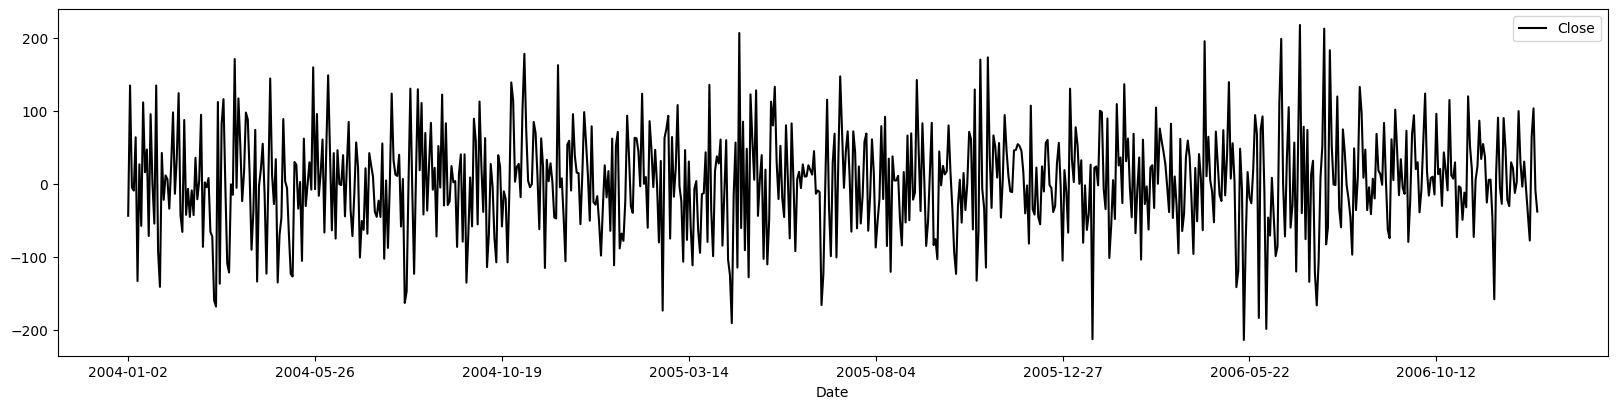

* TESTE ADF

## Interpretando os resultados dos testes ADF

**TESTE ADF:**

**Resposta**:

\\

---

\\

* ## Agora, vamos examinar o gráfico de Autocorrelação da série do índice Dow Jones.

Imports Necessários (acf e pacf)

* **TESTE ADF**

**Nota**:

* **TESTE PACF**

**Nota**

# **Exercício** PIB - (Faça você mesmo)

Acesse a série de código **22100** referente ao PIB Trimestral - Consumo das famílias.

**Dica**: Considere instalar, se necessário, e utilizar a biblioteca DadosAbertosBrasil

In [ ]:
# pip install DadosAbertosBrasil

Imports Necessários

Extração da série e correção do dtype para float

Questões:
* Graficamente, a série possui indicativo de estacionariedade?
* É possível identificar períodos com variações atípicas? Se sim, quais?

## Aplique o teste ADF e KPSS para identificação de estacionariedade

* Teste ADF


* Teste KPSS

## Interpretando os resultados dos testes ADF e KPSS

**ADF**

Lembre: A hipótese nula do teste ADF é que a série é não estacionária.

**Resposta**:

\\

**KPSS**

Lembre: A hipótese nula do teste KPSS é que a série é estacionária.

**Resposta**:


## Primeira Diferença (Dica: utilize o método diff)

Gráfico da série

## Interpretando os resultados dos testes ADF e KPSS


* Teste ADF

* Teste KPSS

**Questão**: Qual a interpretação dos resultados? Algum fator chamou a sua atenção? Quantas diferenciações foram necessárias para estacionarizar a série?

***OBS***: O teste **ADF**, quando aplicado em séries temporais com **outliers**, pode ter seu **poder** afetado, ou seja, a capacidade do teste em corretamente **identificar** a presença ou ausência de uma raiz unitária pode ser comprometida

# Exercício Série Sazonal - (Faça você mesmo)

Dataset: 1455 (BACEN)

Descrição: Índice volume de vendas no varejo - Total - Brasil

Período a ser examinado: **'2014-01' a '2020-01'**

Extração da série e correção do dtype para float

Gráfico da Série

## Aplique o teste ADF e KPSS para identificação de estacionariedade

* Teste ADF

Algum fator chama a atenção para este caso? A série não apresenta tendência!
Vamos aplicar diferenças sazonais?

## Repetindo o teste com as diferenças sazonais aplicadas

\\

---

\\

* # Ruído Branco

<Axes: xlabel='time', ylabel='unidade'>

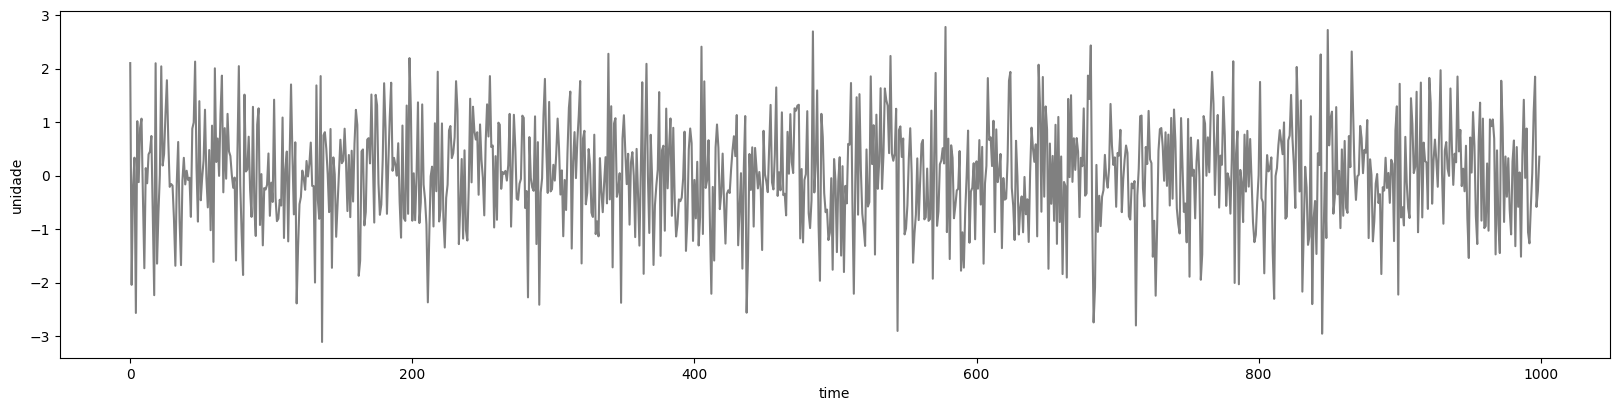

In [ ]:
from scipy.stats import norm

whitenoise = pd.Series(norm.rvs(size=1000))

whitenoise.plot(ylabel = 'unidade', xlabel = 'time', figsize = (20,4.5), color = 'gray')

**O que podemos esperar de um ruído branco?**

GRÁFICO ACF (Dica: plot_acf)

\\

---

\\

# Regressão em Séries Temporais

O consumo de eletricidade de uma pequena cidade foi registado em 12
dias escolhidos aleatoriamente.

(a) Trace os dados e encontre o modelo de regressão para Mwh com
temperatura como variável explicativa. Porque é que existe uma
negativa?

(b) Determine o coeficiente de correlação, r.

(c) Produza um gráfico de resíduos. O modelo é adequado? Existem
Existem observações anómalas?

(d) Utilize o modelo para prever o consumo de eletricidade que
que seria de esperar num dia com temperatura máxima
10± e um dia com temperatura máxima de 35±. Acredita
acredita nestas previsões?

In [ ]:
# df_elet_cons = pd.read_csv('electricity_consumption.csv')

Gráfico da Série

In [ ]:
# df_elet_cons.plot(figsize = (20,4.5))

Regressão Simples em que o consumo é variável resposta e Dia, a variável explanatória.

In [ ]:
import numpy as np
import statsmodels.api as sm


# df_elet_cons = sm.add_constant(df_elet_cons, prepend=False)

# mod = sm.OLS(df_elet_cons.Mwh, df_elet_cons['Day', 'const'])
# res = mod.fit()
# print(res.summary())

**Questão**: Comente sobre o problema ao utilizar o estimador de mínimos quadrados para modelagem de séries temporais.

**Questão** faça a projeção do consumo de energia elétrica para os próximos 18 dias. O que você pode dizer a respeito?

\\

**Exemplo 2**. Tempos de vitória (em segundos) para os
400 metros masculinos em cada Jogos Olímpicos de 1896 a 1996.
Dataset: winning_times

In [ ]:
# df_winning_times = pd.read_csv('winning_times.csv')

Gráfico da Série

In [ ]:
# df_winning_times.plot.scatter(x = 'Year', y = 'Time')

**Questão:** Descreva as as principais características do gráfico de dispersão.

**Questão**: A que taxa média por ano os tempos de corrida decrescem por ano?

**Questão**: Preveja o tempo vencedor dos 400 metros masculinos nos Jogos Olímpicos de 2000.

\\

---

\\

Agora, vamos gerar um processo autoregressivo com dois termos autoregressivos e posteriormente estimá-lo.

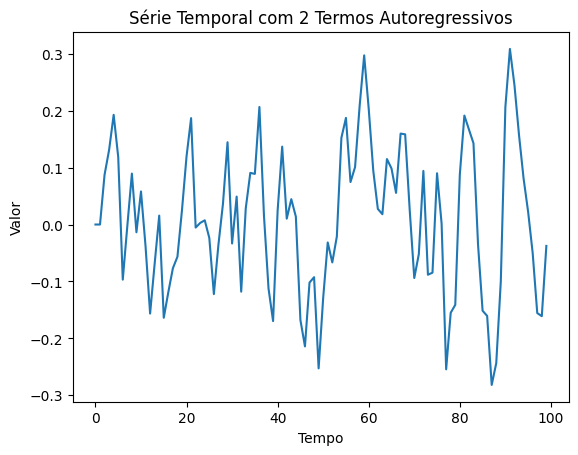

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_samples = 100      # Número de pontos na série temporal
AR_coef = [0.8, -0.3]  # Coeficientes autoregressivos

time_series = [0, 0]  # Os dois primeiros valores são arbitrários

for t in range(2, num_samples):

    # Calculando o próximo valor autoregressivo
    next_value = AR_coef[0] * time_series[t-1] + AR_coef[1] * time_series[t-2]

    # Ruído branco (opcional)
    next_value += np.random.normal(0, 0.1)  # Descomente essa linha para adicionar ruído

    time_series.append(next_value)

plt.plot(time_series)
plt.title('Série Temporal com 2 Termos Autoregressivos')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.show()

**Questão**: Faça a estimação de um modelo autoregressivo para série acima e identifique quais foram os coeficientes estimados.